#### Name - Ritika Tomar
#### Roll Number - 2018IMT-084
#### Deadline - 25th October 2021

### Importing libraries and dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df = pd.read_csv("iris.data")

In [2]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
print(df['class'].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


### Data pre-processing

In [4]:
from sklearn.preprocessing import LabelEncoder
le_class = LabelEncoder()
df['class'] = le_class.fit_transform(df['class'])

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<AxesSubplot:>

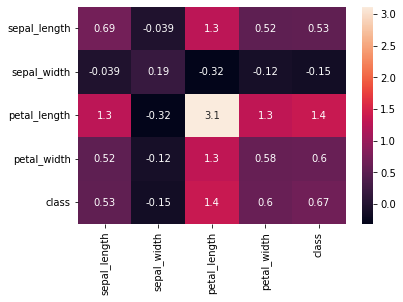

In [6]:
data_cov = df.cov()
sns.heatmap(data_cov,annot=True)

In [7]:
X = df.filter(['sepal_length','sepal_width','petal_length','petal_width'])
y = df['class']

In [8]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### Training and Test set splitting

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [10]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

gnb = GaussianNB()

In [11]:
accuracy_li = {}
accuracy_li_train = {}

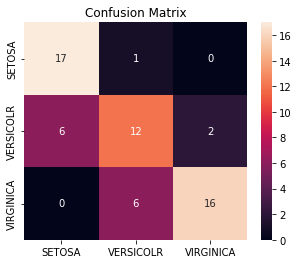

Accuracy of the model with only  sepal_length  feature =  0.75


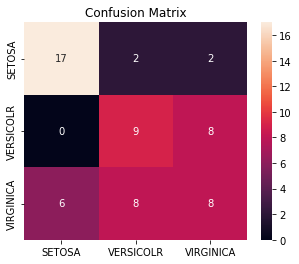

Accuracy of the model with only  sepal_width  feature =  0.5666666666666667


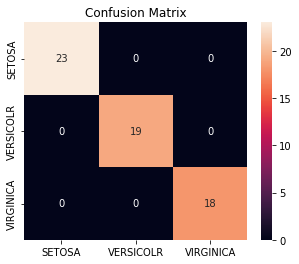

Accuracy of the model with only  petal_length  feature =  1.0


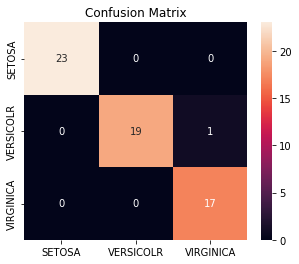

Accuracy of the model with only  petal_width  feature =  0.9833333333333333


In [12]:
for (featureName,featureData) in X_train.iteritems():
    
    tmp_X_train = X_train.filter([featureName])
    gnb.fit(tmp_X_train,y_train)
    tmp_X_test = X_test.filter([featureName])
    y_pred = gnb.predict(tmp_X_test)
    
    accuracy = accuracy_score(y_pred,y_test)
    accuracy_train = accuracy_score(gnb.predict(tmp_X_train),y_train)
    cm = confusion_matrix(y_pred,y_test)
    cm_df = pd.DataFrame(cm,index = ['SETOSA','VERSICOLR','VIRGINICA'],columns =['SETOSA','VERSICOLR','VIRGINICA'])
    plt.figure(figsize=(5,4))
    sns.heatmap(cm_df, annot=True)
    plt.title('Confusion Matrix')
    plt.show()
    
    print("Accuracy of the model with only ",featureName," feature = ",accuracy)
    
    accuracy_li[featureName] = accuracy
    accuracy_li_train[featureName] = accuracy_train

##### Best feature that gives maximum accuracy is petal_length

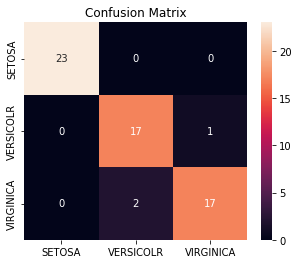

Accuracy of the model with petal_length and  sepal_length  feature =  0.95


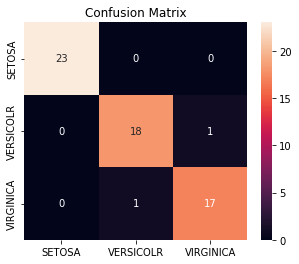

Accuracy of the model with petal_length and  sepal_width  feature =  0.9666666666666667


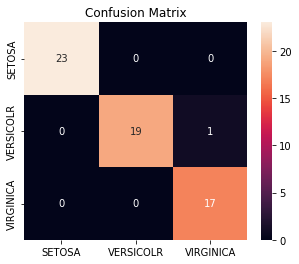

Accuracy of the model with petal_length and  petal_width  feature =  0.9833333333333333


In [13]:
for (featureName,featureData) in X_train.iteritems():
    if featureName == 'petal_length':
        continue
    
    tmp_X_train = X_train.filter([featureName,'petal_length'])
    gnb.fit(tmp_X_train,y_train)
    tmp_X_test = X_test.filter([featureName,'petal_length'])
    y_pred = gnb.predict(tmp_X_test)
    
    accuracy = accuracy_score(y_pred,y_test)
    accuracy_train = accuracy_score(gnb.predict(tmp_X_train),y_train)
    cm = confusion_matrix(y_pred,y_test)
    cm_df = pd.DataFrame(cm,index = ['SETOSA','VERSICOLR','VIRGINICA'],columns =['SETOSA','VERSICOLR','VIRGINICA'])
    plt.figure(figsize=(5,4))
    sns.heatmap(cm_df, annot=True)
    plt.title('Confusion Matrix')
    plt.show()
    
    print("Accuracy of the model with petal_length and ",featureName," feature = ",accuracy)
    
    accuracy_li[featureName+', petal_length'] = accuracy
    accuracy_li_train[featureName+', petal_length'] = accuracy_train

In [14]:
accuracy_li

{'sepal_length': 0.75,
 'sepal_width': 0.5666666666666667,
 'petal_length': 1.0,
 'petal_width': 0.9833333333333333,
 'sepal_length, petal_length': 0.95,
 'sepal_width, petal_length': 0.9666666666666667,
 'petal_width, petal_length': 0.9833333333333333}

In [15]:
acc_df_test = pd.DataFrame(accuracy_li.items(),columns=['Features','Accuracy'])
acc_df_train = pd.DataFrame(accuracy_li_train.items(),columns=['Features','Accuracy'])
accuracy_li

{'sepal_length': 0.75,
 'sepal_width': 0.5666666666666667,
 'petal_length': 1.0,
 'petal_width': 0.9833333333333333,
 'sepal_length, petal_length': 0.95,
 'sepal_width, petal_length': 0.9666666666666667,
 'petal_width, petal_length': 0.9833333333333333}

Text(7, 0.6, '0 - sepal_length\n1 - sepal_width\n2 - petal_length\n3 - petal_width\n4 - petal_length, sepal_length\n5 - petal_length, sepal_width\n6 - petal_length, petal_width\n')

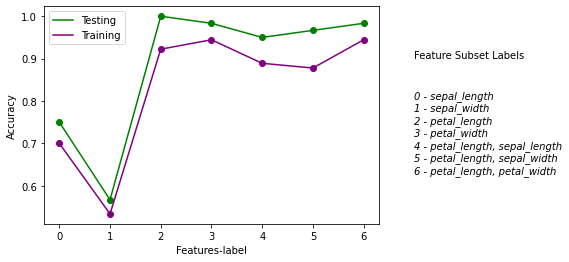

In [16]:
x = np.arange(0,len(accuracy_li))
y_test = np.array(acc_df_test['Accuracy'])
y_train = np.array(acc_df_train['Accuracy'])

plt.scatter(x,y_test,color='green')
plt.plot(x,y_test,color='green',label='Testing')
plt.scatter(x,y_train,color='purple')
plt.plot(x,y_train,color='purple',label='Training')
plt.legend(loc=0)
plt.xlabel('Features-label')
plt.ylabel('Accuracy')
plt.text(7,0.9,'Feature Subset Labels')
plt.text(7, 0.6, '0 - sepal_length\n1 - sepal_width\n2 - petal_length\n3 - petal_width\n4 - petal_length, sepal_length\n5 - petal_length, sepal_width\n6 - petal_length, petal_width\n', style='italic')

#### The best feature for the training considering the train and test set accuracy = petal_length, petal_width